In [7]:
from matplotlib.image import imread
import os

image = imread(os.path.join("images", "flower.jpeg"))
image.shape

(670, 1000, 3)

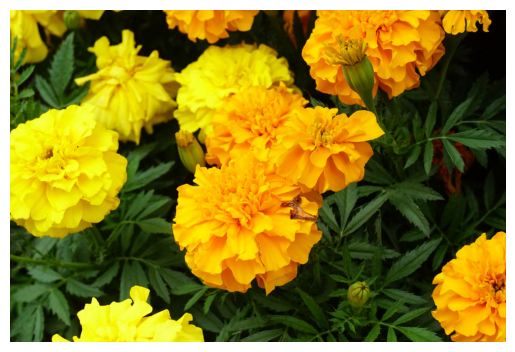

In [8]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(image)
plt.axis("off")
plt.show()

In [9]:
X = image.reshape(-1, 3)
X.shape

(670000, 3)

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape).astype(int)

ModuleNotFoundError: No module named 'sklearn'

In [4]:
plt.figure()
plt.imshow(segmented_img)
plt.axis("off")
plt.show()

NameError: name 'segmented_img' is not defined

<Figure size 640x480 with 0 Axes>

Using Clustering for Preprocessing

In [38]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)
X_train.shape

(1347, 64)

In [48]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [49]:
log_reg.score(X_test, y_test)

0.9666666666666667

In [50]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", log_reg)
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression(max_iter=10000))])

In [51]:
pipeline.score(X_test, y_test)

0.9733333333333334

In [52]:
#We find now the best value for n_clusters using GridSearchCV to get the best classification performance during cross-validation
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=(range(2, 100)))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.6s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.6s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.7s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.9s
[CV] END ...............................kmeans__n_clusters=4; total time=   1.3s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.7s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.9s
[CV] END ...............................kmeans__n_clusters=5; total time=   1.1s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.7s
[CV] END ...............................kmeans_

/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................kmeans__n_clusters=6; total time=   1.5s
[CV] END ...............................kmeans__n_clusters=6; total time=   1.4s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................kmeans__n_clusters=6; total time=   1.5s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................kmeans__n_clusters=7; total time=   1.5s
[CV] END ...............................kmeans__n_clusters=7; total time=   1.1s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................kmeans__n_clusters=7; total time=   1.6s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................kmeans__n_clusters=8; total time=   2.6s
[CV] END ...............................kmeans__n_clusters=8; total time=   1.6s
[CV] END ...............................kmeans__n_clusters=8; total time=   1.4s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................kmeans__n_clusters=9; total time=   1.7s
[CV] END ...............................kmeans__n_clusters=9; total time=   1.3s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...............................kmeans__n_clusters=9; total time=   1.8s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=10; total time=   1.6s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=10; total time=   1.7s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=10; total time=   1.5s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=11; total time=   1.7s
[CV] END ..............................kmeans__n_clusters=11; total time=   1.2s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=11; total time=   1.6s
[CV] END ..............................kmeans__n_clusters=12; total time=   1.3s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=12; total time=   1.9s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=12; total time=   1.6s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=13; total time=   1.6s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=13; total time=   1.7s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=13; total time=   2.0s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=14; total time=   2.1s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=14; total time=   1.6s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=14; total time=   1.7s
[CV] END ..............................kmeans__n_clusters=15; total time=   1.5s
[CV] END ..............................kmeans__n_clusters=15; total time=   1.6s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=15; total time=   1.6s
[CV] END ..............................kmeans__n_clusters=16; total time=   1.6s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=16; total time=   1.7s
[CV] END ..............................kmeans__n_clusters=16; total time=   1.7s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=17; total time=   1.8s
[CV] END ..............................kmeans__n_clusters=17; total time=   1.6s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=17; total time=   1.9s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=18; total time=   1.8s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=18; total time=   1.7s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=18; total time=   1.7s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=19; total time=   1.8s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=19; total time=   1.8s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=19; total time=   1.9s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=20; total time=   1.7s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=20; total time=   1.7s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=20; total time=   1.8s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=21; total time=   2.1s
[CV] END ..............................kmeans__n_clusters=21; total time=   1.6s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=21; total time=   1.8s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=22; total time=   2.0s
[CV] END ..............................kmeans__n_clusters=22; total time=   1.7s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=22; total time=   1.9s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=23; total time=   1.8s
[CV] END ..............................kmeans__n_clusters=23; total time=   1.5s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=23; total time=   1.9s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=24; total time=   1.8s
[CV] END ..............................kmeans__n_clusters=24; total time=   1.6s
[CV] END ..............................kmeans__n_clusters=24; total time=   1.6s
[CV] END ..............................kmeans__n_clusters=25; total time=   1.7s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=25; total time=   1.8s
[CV] END ..............................kmeans__n_clusters=25; total time=   1.8s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=26; total time=   1.8s
[CV] END ..............................kmeans__n_clusters=26; total time=   1.8s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=26; total time=   1.8s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=27; total time=   2.0s
[CV] END ..............................kmeans__n_clusters=27; total time=   1.4s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=27; total time=   2.0s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=28; total time=   2.0s
[CV] END ..............................kmeans__n_clusters=28; total time=   1.6s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=28; total time=   2.0s
[CV] END ..............................kmeans__n_clusters=29; total time=   1.6s
[CV] END ..............................kmeans__n_clusters=29; total time=   1.7s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=29; total time=   2.1s
[CV] END ..............................kmeans__n_clusters=30; total time=   3.3s
[CV] END ..............................kmeans__n_clusters=30; total time=   7.9s
[CV] END ..............................kmeans__n_clusters=30; total time=  15.4s
[CV] END ..............................kmeans__n_clusters=31; total time=  20.5s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=31; total time=  17.1s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=31; total time=  13.6s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=32; total time=  13.4s
[CV] END ..............................kmeans__n_clusters=32; total time=  11.1s
[CV] END ..............................kmeans__n_clusters=32; total time=  13.1s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=33; total time=  14.3s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=33; total time=  13.5s
[CV] END ..............................kmeans__n_clusters=33; total time=  10.8s
[CV] END ..............................kmeans__n_clusters=34; total time=  12.3s
[CV] END ..............................kmeans__n_clusters=34; total time=   7.4s
[CV] END ..............................kmeans__n_clusters=34; total time=  13.1s
[CV] END ..............................kmeans__n_clusters=35; total time=  15.6s
[CV] END ..............................kmeans__n_clusters=35; total time=  12.2s
[CV] END ..............................kmeans__n_clusters=35; total time=  11.5s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=36; total time=  13.6s
[CV] END ..............................kmeans__n_clusters=36; total time=  10.0s
[CV] END ..............................kmeans__n_clusters=36; total time=  10.6s
[CV] END ..............................kmeans__n_clusters=37; total time=  10.6s
[CV] END ..............................kmeans__n_clusters=37; total time=  10.5s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=37; total time=  15.2s
[CV] END ..............................kmeans__n_clusters=38; total time=   9.3s
[CV] END ..............................kmeans__n_clusters=38; total time=   7.7s
[CV] END ..............................kmeans__n_clusters=38; total time=  11.5s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=39; total time=  13.6s
[CV] END ..............................kmeans__n_clusters=39; total time=  10.4s
[CV] END ..............................kmeans__n_clusters=39; total time=  12.8s
[CV] END ..............................kmeans__n_clusters=40; total time=  14.6s
[CV] END ..............................kmeans__n_clusters=40; total time=  11.8s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=40; total time=  14.6s
[CV] END ..............................kmeans__n_clusters=41; total time=  12.7s
[CV] END ..............................kmeans__n_clusters=41; total time=   8.6s
[CV] END ..............................kmeans__n_clusters=41; total time=  11.1s
[CV] END ..............................kmeans__n_clusters=42; total time=  12.1s
[CV] END ..............................kmeans__n_clusters=42; total time=   9.6s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=42; total time=  17.5s
[CV] END ..............................kmeans__n_clusters=43; total time=  11.6s
[CV] END ..............................kmeans__n_clusters=43; total time=  11.9s
[CV] END ..............................kmeans__n_clusters=43; total time=  12.6s
[CV] END ..............................kmeans__n_clusters=44; total time=  13.8s
[CV] END ..............................kmeans__n_clusters=44; total time=  10.8s
[CV] END ..............................kmeans__n_clusters=44; total time=   7.7s
[CV] END ..............................kmeans__n_clusters=45; total time=   4.5s
[CV] END ..............................kmeans__n_clusters=45; total time=   4.1s
[CV] END ..............................kmeans__n_clusters=45; total time=   2.7s
[CV] END ..............................kmeans__n_clusters=46; total time=   4.5s
[CV] END ..............................kmeans__n_clusters=46; total time=   3.5s
[CV] END ...................

/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=61; total time=  17.4s
[CV] END ..............................kmeans__n_clusters=62; total time=   9.1s
[CV] END ..............................kmeans__n_clusters=62; total time=  12.9s
[CV] END ..............................kmeans__n_clusters=62; total time=  10.1s
[CV] END ..............................kmeans__n_clusters=63; total time=  15.9s
[CV] END ..............................kmeans__n_clusters=63; total time=   8.2s
[CV] END ..............................kmeans__n_clusters=63; total time=  10.8s
[CV] END ..............................kmeans__n_clusters=64; total time=   7.7s
[CV] END ..............................kmeans__n_clusters=64; total time=   7.4s
[CV] END ..............................kmeans__n_clusters=64; total time=  10.9s
[CV] END ..............................kmeans__n_clusters=65; total time=  10.4s
[CV] END ..............................kmeans__n_clusters=65; total time=  12.5s
[CV] END ...................

/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=69; total time=  15.5s
[CV] END ..............................kmeans__n_clusters=69; total time=   6.2s
[CV] END ..............................kmeans__n_clusters=69; total time=  13.0s
[CV] END ..............................kmeans__n_clusters=70; total time=  11.2s
[CV] END ..............................kmeans__n_clusters=70; total time=   9.5s
[CV] END ..............................kmeans__n_clusters=70; total time=  11.3s
[CV] END ..............................kmeans__n_clusters=71; total time=  14.9s
[CV] END ..............................kmeans__n_clusters=71; total time=  11.9s
[CV] END ..............................kmeans__n_clusters=71; total time=  10.9s
[CV] END ..............................kmeans__n_clusters=72; total time=   8.8s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=72; total time=  17.3s
[CV] END ..............................kmeans__n_clusters=72; total time=  10.1s
[CV] END ..............................kmeans__n_clusters=73; total time=   7.4s
[CV] END ..............................kmeans__n_clusters=73; total time=  12.0s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=73; total time=  17.7s
[CV] END ..............................kmeans__n_clusters=74; total time=  19.0s
[CV] END ..............................kmeans__n_clusters=74; total time=   3.0s
[CV] END ..............................kmeans__n_clusters=74; total time=   5.0s
[CV] END ..............................kmeans__n_clusters=75; total time=   6.0s
[CV] END ..............................kmeans__n_clusters=75; total time=   2.8s
[CV] END ..............................kmeans__n_clusters=75; total time=   4.0s


/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=76; total time=   6.2s
[CV] END ..............................kmeans__n_clusters=76; total time=   6.5s
[CV] END ..............................kmeans__n_clusters=76; total time=   5.2s
[CV] END ..............................kmeans__n_clusters=77; total time=   4.7s
[CV] END ..............................kmeans__n_clusters=77; total time=   3.1s
[CV] END ..............................kmeans__n_clusters=77; total time=   2.3s
[CV] END ..............................kmeans__n_clusters=78; total time=   3.5s
[CV] END ..............................kmeans__n_clusters=78; total time=   6.2s
[CV] END ..............................kmeans__n_clusters=78; total time=   6.5s
[CV] END ..............................kmeans__n_clusters=79; total time=   2.9s
[CV] END ..............................kmeans__n_clusters=79; total time=   5.6s
[CV] END ..............................kmeans__n_clusters=79; total time=   6.0s
[CV] END ...................

/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=88; total time=   6.1s
[CV] END ..............................kmeans__n_clusters=88; total time=   3.8s
[CV] END ..............................kmeans__n_clusters=88; total time=   3.3s
[CV] END ..............................kmeans__n_clusters=89; total time=   3.7s
[CV] END ..............................kmeans__n_clusters=89; total time=   5.4s
[CV] END ..............................kmeans__n_clusters=89; total time=   3.3s
[CV] END ..............................kmeans__n_clusters=90; total time=   3.5s
[CV] END ..............................kmeans__n_clusters=90; total time=   4.9s
[CV] END ..............................kmeans__n_clusters=90; total time=   3.5s
[CV] END ..............................kmeans__n_clusters=91; total time=   6.5s
[CV] END ..............................kmeans__n_clusters=91; total time=   2.9s
[CV] END ..............................kmeans__n_clusters=91; total time=   3.3s
[CV] END ...................

/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [53]:
grid_clf.best_params_

{'kmeans__n_clusters': 53}

In [54]:
grid_clf.score(X_test, y_test)

0.9688888888888889

Using Clustering for Semi-Supervised Learning

In [60]:
log_reg.score(X_test, y_test)

0.8488888888888889

In [156]:
#We simulate that we have only 50 instances of labeled data, then use k-Mean on the full traning set
#Load MNIST dataset from sklearn
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X_train, X_test, y_train, y_test = train_test_split(mnist['data'], mnist['target'])

In [159]:
X_train_ = X_train.to_numpy()
X_test_ = X_test.to_numpy()
y_train_ = y_train.to_numpy()
y_test_ = y_test.to_numpy()

In [162]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train_[:n_labeled], y_train_[:n_labeled])
log_reg.score(X_test_, y_test_)

0.6684

In [163]:
import numpy as np
k=50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train_)
representative_digits_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train_[representative_digits_idx]
X_representative_digits.shape

(50, 784)

In [164]:
X_representative_digits_reshape = X_representative_digits.reshape(-1, 28, 28)
X_representative_digits_reshape.shape

(50, 28, 28)

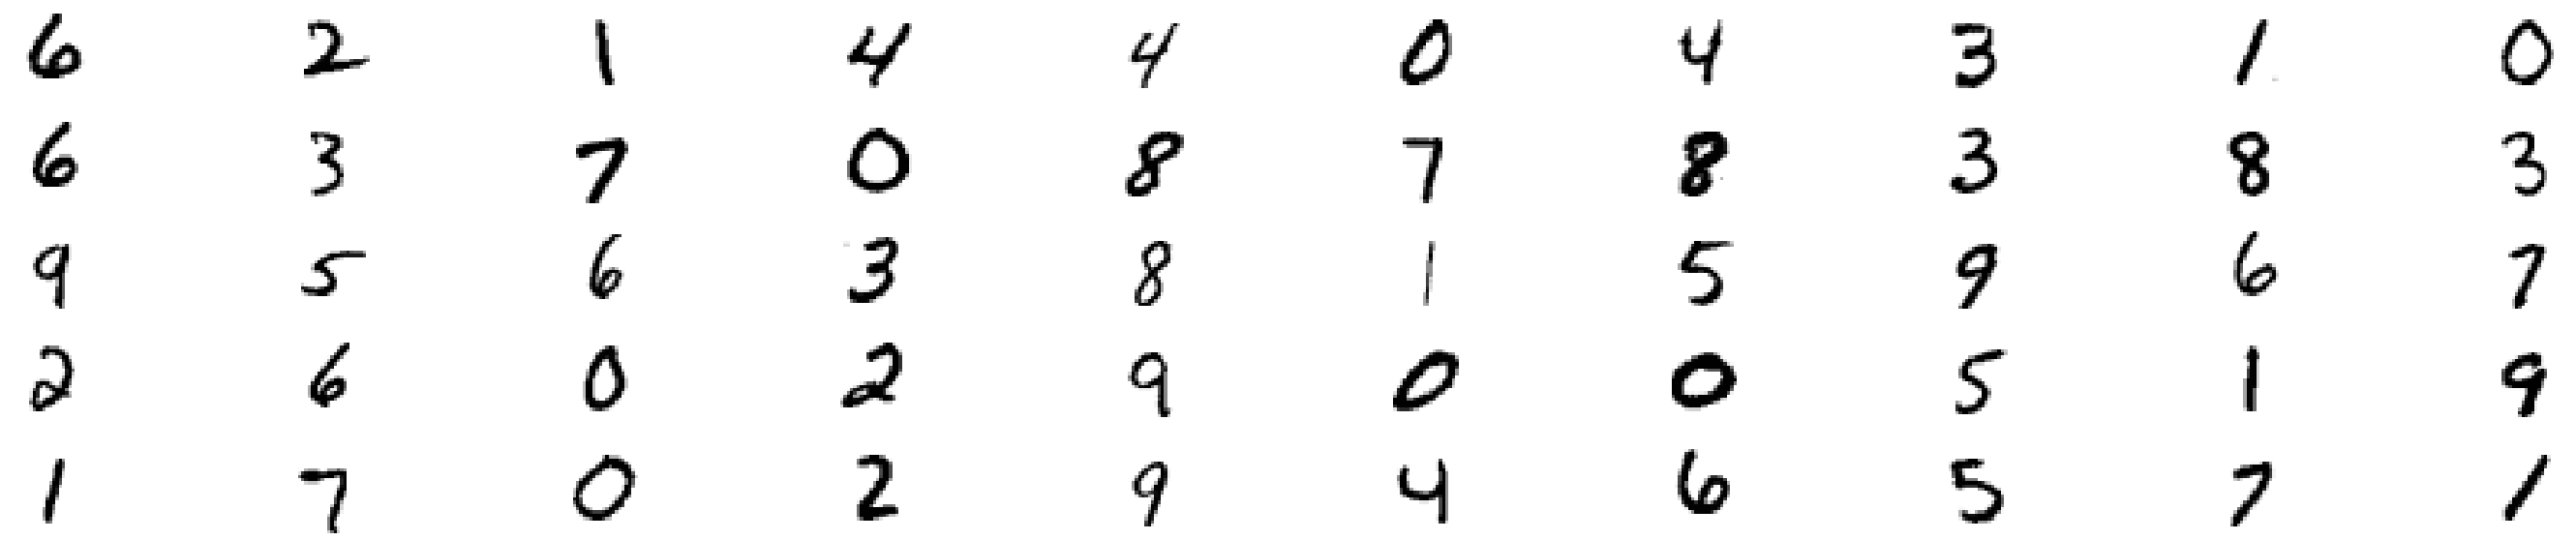

In [165]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure(figsize=(50, 10))
for index in range(k):
    sub = fig.add_subplot(5, 10, index + 1)
    sub.imshow(X_representative_digits_reshape[index], cmap = mpl.cm.binary, interpolation="nearest")
    sub.axis("off")

In [166]:
y_representative_digits = np.array([6, 2, 1, 4, 4, 0, 4, 3, 1, 0, 6, 3, 7, 0, 8, 7, 8, 3, 8, 3, 9, 5, 6, 3, 8, 1, 5, 9, 6, 7, 2, 6, 0, 2, 9, 0, 0, 5, 1, 9, 1, 7, 0, 2, 9, 4, 6, 5, 7, 1])

In [203]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test_, y_test_)

0.0

In [192]:
#We propagate here the labels of the instances in each cluster from the representative label in that cluster
y_train_propagated = np.empty(len(X_train_), dtype=np.int32)
for i in range(k):
    print(str(kmeans_labels_)
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [201]:
log_reg = LogisticRegression()
log_reg.fit(X_train_, y_train_propagated)

/Users/amqo/Desktop/Cursos/Data_Science/HandsOn/env_handsOn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [202]:
log_reg.score(X_test_, y_test_)

0.0